<a href="https://colab.research.google.com/github/mmmunyo/lec/blob/main/(%EC%83%89)Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python numpy matplotlib

Saving dna-1903318_1280.jpg to dna-1903318_1280.jpg


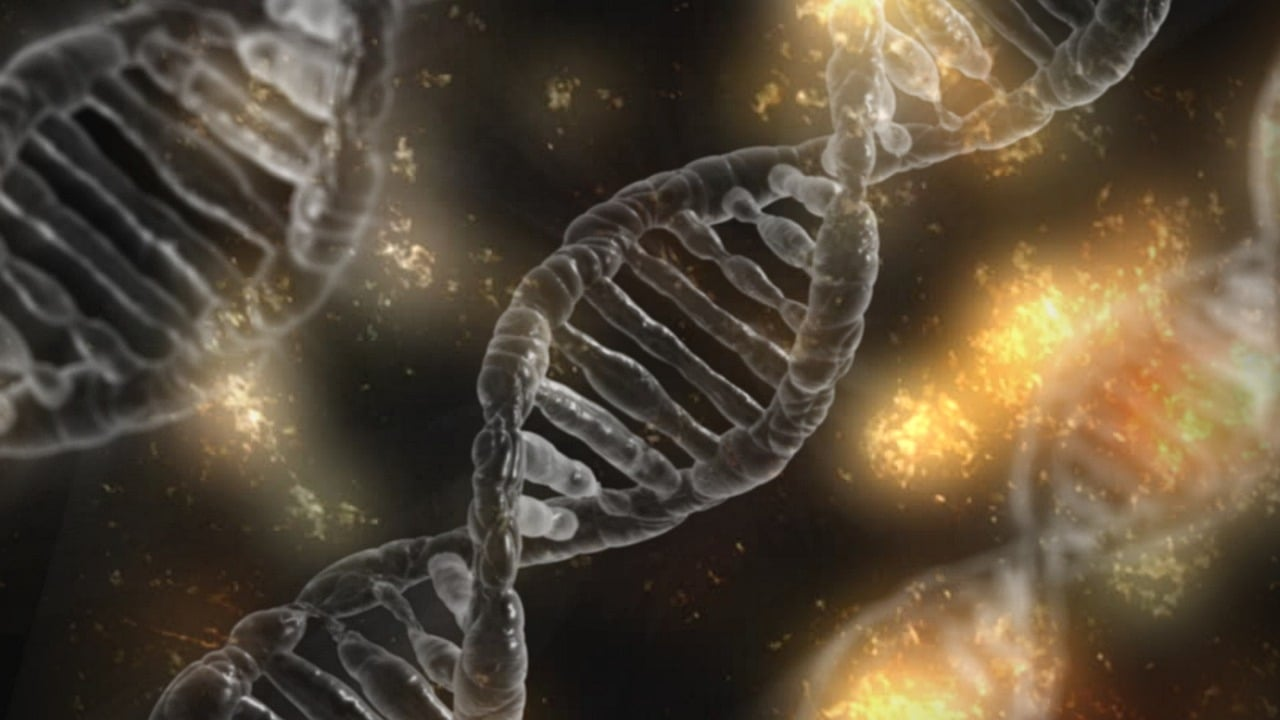

In [5]:
from google.colab import files
from IPython.display import display
from PIL import Image
import io

uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[filename]))
    display(img)


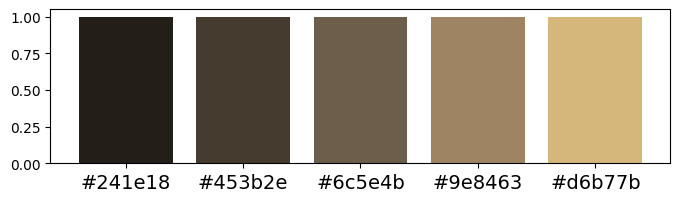

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

def extract_colors(image_path, k=5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (600, 400))

    pixels = image.reshape((-1, 3))
    # Use KMeans from sklearn.cluster
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(pixels)
    counts = Counter(labels)

    center_colors = kmeans.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]

    hex_colors = ['#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2])) for c in ordered_colors]
    return hex_colors, ordered_colors

# Extract colors
hex_colors, rgb_colors = extract_colors(list(uploaded.keys())[0])

# Show the colors
plt.figure(figsize=(8, 2))
plt.bar(range(len(hex_colors)), [1]*len(hex_colors), color=hex_colors)
plt.xticks(range(len(hex_colors)), hex_colors, fontsize=14)
plt.show()